# Predictive Modeling: Donor Retention in Non-Profit Organizations

## Introduction
Non-Profit Organizations (NPOs) play a vital role in social, educational, and economic development, but they rely heavily on fundraising, which makes understanding donor behavior critical, as one of the major challenges NPOs face is maintaining donor engagement and loyalty over time.


This project aims to tackle this issue by analyzing donor behavior to identify both loyal and at-risk donors. The insights gained will support NPOs in designing more effective fundraising and communication strategies, ultimately enhancing their ability to sustain and grow their initiatives.

To achieve this, we use the [Donor Data](https://www.kaggle.com/datasets/maheshpandey87/donor-data/data)
from Kaggle, which comprises six tables detailing donors, donations, campaigns, project results, and engagement activities. These data provide a comprehensive view of donor interactions and contributions, forming the basis for our analysis.

 ## Methodology
 #### **Exploratory data Analysis**
 - data preparation
 - business understanding
 - data understanding
 #### **Major questions**
These questions deepen our grasp of the business and data context, steering the analysis toward the NPO’s core concerns and enabling a thorough exploration of donor dynamics.

This part is crucial, as it serves as a compass that guides our analysis and helps address stakeholders' concerns or uncover relevant information.
#### **Modeling**
""'''''
#### **Model Evaluation**
#### **Recommendations**
#### **Contact information**
the contact information of the two data scientist who work on this project is provided.
The scientist colaborated equally on this project.
- name
- email
- phone number
- LinkedIn


## EDA – Exploratory Data Analysis

### Data preparation

**Libraries importation**

In [57]:
import pandas as pd
donors= pd.read_csv('donors.csv')
campaigns= pd.read_csv('campaigns.csv')
donations= pd.read_csv('donations_linked.csv')
engagement_history= pd.read_csv('engagement_history.csv')
engagement_outcomes =pd.read_csv('engagement_outcomes.csv')
impact= pd.read_csv('impact.csv')

**Merging all Tables**

In [58]:
Donors_donations= pd.merge(donors,donations , on='DonorID', how='left')
Donors_donations_Campaigns= pd.merge(Donors_donations, campaigns, on='CampaignID', how='left')
Donors_donations_Campaigns_engagement_history =pd.merge(Donors_donations_Campaigns, engagement_history, on='DonorID',  how='left')
Donors_donations_Campaigns_engagement_history_impacts =pd.merge(Donors_donations_Campaigns_engagement_history,impact, on ='CampaignID', how='left')

Comment: there are 7 tables in the dataset, we merge 6 of them because donors.csv and donations.csv are the same tables.

In [59]:
# all tables are merged into one
df= Donors_donations_Campaigns_engagement_history_impacts

In [60]:
# the merged table
df.head()

,DonorID,Age,Gender,Location,JoinDate,DonationID,DonationDate,Amount,CampaignID,CampaignName,StartDate,EndDate,TargetAmount,ActualAmount,Channel,Date,EngagementOutcome,ImpactType,Value,Cost
0,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Workshops Delivered,31.0,100.0
1,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Youth Reached,851.0,25.0
2,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Volunteers Engaged,450.0,25.0
3,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Training Sessions,100.0,75.0
4,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Mentorship Hours,406.0,35.0


**Table's shape**

In [61]:
df.shape

(440083, 20)

**Null values**

In [62]:
# drop rows with null values
df[df.isnull().any(axis=1)]
df = df.dropna(subset=['DonationID'])

**Duplicates**

In [46]:
# drop rows with duplicates
duplicates = df[df.duplicated()]
print("Number of duplicate rows before dropping:", duplicates.shape[0])
df = df.drop_duplicates()
print("Number of duplicate rows after dropping:", df.duplicated().sum())
# Dropping rows duplicate donation ID
df = df.drop_duplicates(subset=['DonationID'])

Number of duplicate rows before dropping: 205
Number of duplicate rows after dropping: 0


In [47]:
# to check that all NULL were dropped run the code in this cell :
# df.isnull().sum().sort_values(ascending=False)

**Reformating**

In [48]:
df.head()

,DonorID,Age,Gender,Location,JoinDate,DonationID,DonationDate,Amount,CampaignID,CampaignName,StartDate,EndDate,TargetAmount,ActualAmount,Channel,Date,EngagementOutcome,ImpactType,Value,Cost
0,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT002656,2015-06-16,124.99,CAMP005,Youth Initiative 005,59:27.6,59:27.6,54063.32,62346.29,Social Media,27/12/2022,Not Reached,Workshops Delivered,31.0,100.0
45,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT011160,2021-11-20,124.46,CAMP003,Youth Initiative 003,59:27.6,59:27.6,38582.41,33179.39,Social Media,27/12/2022,Not Reached,Workshops Delivered,19.0,100.0
90,DNR00001,56,Male,QLD,2020-10-03 22:59:27.552825,DNT012124,2017-09-14,128.22,CAMP010,Youth Initiative 010,59:27.6,59:27.6,50455.82,54176.99,Social Media,27/12/2022,Not Reached,Workshops Delivered,40.0,100.0
135,DNR00002,25,Male,ACT,2015-11-01 22:59:27.552825,DNT001904,2020-04-17,175.96,CAMP008,Youth Initiative 008,59:27.6,59:27.6,98200.79,102566.77,Newsletter,9/09/2023,Not Reached,Workshops Delivered,85.0,100.0
150,DNR00002,25,Male,ACT,2015-11-01 22:59:27.552825,DNT011974,2017-01-19,35.31,CAMP006,Youth Initiative 006,59:27.6,59:27.6,33193.34,39159.84,Newsletter,9/09/2023,Not Reached,Workshops Delivered,25.0,100.0


In [49]:
# reformat rows for better data management.
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['JoinDate'] = df['JoinDate'].dt.date


In [50]:
# after cleaning we save the  merged dataset
df.to_csv('Data.csv',index=0)

In [51]:
# shape after cleaning :
df.shape

(17840, 20)

### Business understanding

In today’s fast-evolving fundraising landscape, nonprofit organisations face growing pressure to engage supporters meaningfully, demonstrate impact, and build trust through transparency. Traditional, instinct-driven approaches no longer meet modern donor expectations

Adopting a data-informed approach is not just a technical upgrade—it’s a cultural shift that aligns mission, message, and measurement. With the right mindset and existing tools, even small organisations can use data to boost engagement and impact.

Delivering measurable change increasingly depends on how well nonprofits engage and retain supporters. As donor expectations rise and attention spans shrink, sustaining long-term relationships becomes a major challenge . Data-driven organisations are up to three times more likely to achieve mission-aligned growth and build lasting trust .

Our objectives focus on reducing donor churn, strengthening relationships, and improving alignment between fundraising and impact. We aim to engage donors and inspire new strategies for attraction and retention and show data inpired Analysis and modeling in the context of NPOs.







### Data Understanding
A synthetic dataset was created to reflect the operational characteristics of a nonprofit focused on youth and community welfare. It includes relational tables for donors, donations, campaigns, impact outcomes, and engagement activities. These tables are structured to support a complete engagement analysis from start to finish.

Although the data is fictitious, it reflects realistic patterns based on sector research. These patterns include donor attrition, variations in donation behavior, and inconsistent campaign performance (Virtuous, 2024). The goal is to encourage the use of data in nonprofit environments and to provide the NPO community with a clear example of what a data-informed approach can accomplish. This simulation allows for open analysis while maintaining privacy and ethical standards.

The structure of the dataset makes it possible to demonstrate how nonprofit engagement can be improved through analytics without relying on sensitive real-world data.


## Major questions
this section is a follow up of the two previous sections. it builds our business and data understanding and allow us to leverage the data to get meaningful and pertinent information.

### randomn thoughts
( this cell will be deleted later)

this section is reserved for random notes( it doesn't have to make sense for the other other data scientist working on this notebook (this cell will be deleted later)

\""" 3 aspects for this analysis
""" Comparaison of campaign to outcomes.
Comparaison between outcomes and channel
maybe I can do those two stuff with a stack bar chart ?

to understand engagement we should counts donations and responses
look at how frequently donors interact
note to myself:  
note to myself : engagement is based on donations count, donataion amount and how donor behave. We need to look at engagement history, how donor behave and campaign performance.

relationship between contact to donors and donor retention.

Identify the caracteristics of donors with higher retention.


**How many time a donors is likely to donate ?**

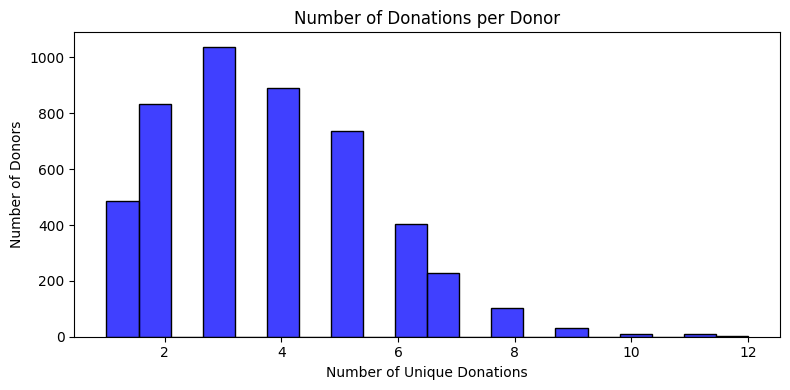

In [52]:
# import necessary library
import matplotlib.pyplot as plt
import seaborn as sns

# Group by DonorID to get donation count
donation_counts = donations.groupby('DonorID')['DonationID'].count()

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(donation_counts, bins=20, kde=False, color='blue')
plt.title('Number of Donations per Donor')
plt.xlabel('Number of Unique Donations')
plt.ylabel('Number of Donors')
plt.tight_layout()
plt.show()

Comment: Most donors donates around 2 to 4 times.
We can observe that the Number of Donors decreases For higher number of donations, showing moderate donor retention.





/tmp/ipython-input-1367377034.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  donations['DonationDate'] = pd.to_datetime(donations['DonationDate'], dayfirst=True)


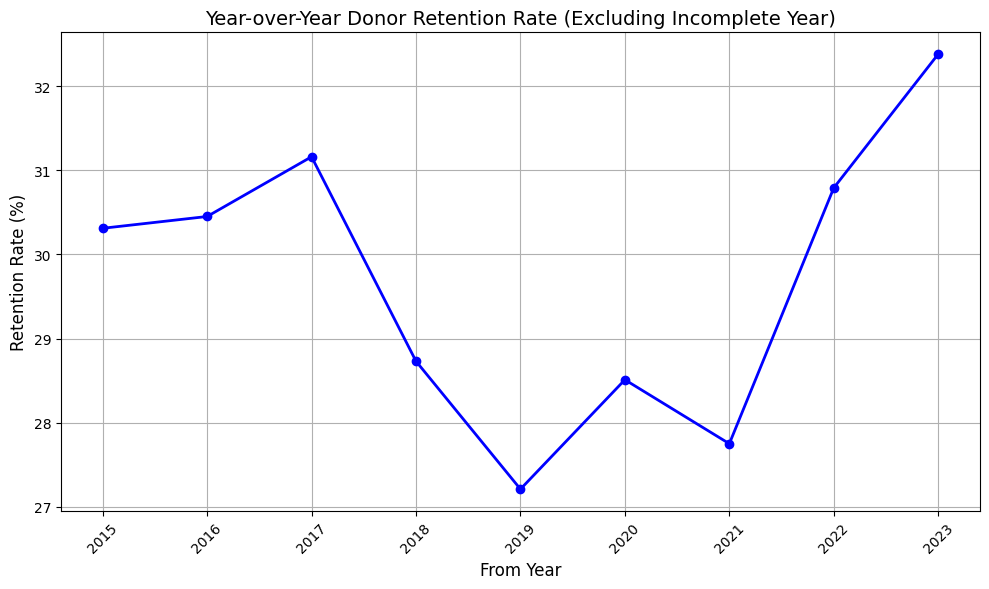

In [53]:
donations['DonationDate'] = pd.to_datetime(donations['DonationDate'], dayfirst=True)

# Extract donation year
donations['DonationYear'] = donations['DonationDate'].dt.year
years = sorted(donations['DonationYear'].unique())
retention_stats = []

for i in range(len(years) -1 ):
    year_current = years[i]
    year_next = years[i + 1]

    donors_current = set(donations[donations['DonationYear'] == year_current]['DonorID'])
    donors_next = set(donations[donations['DonationYear'] == year_next]['DonorID'])

    retained_donors = donors_current & donors_next
    retention_rate = len(retained_donors) / len(donors_current) * 100 if donors_current else 0

    retention_stats.append({
        "From Year": year_current,
        "To Year": year_next,
        "Donors in Year": len(donors_current),
        "Retained Donors": len(retained_donors),
        "Retention Rate (%)": round(retention_rate, 2)
    })

retention_df = pd.DataFrame(retention_stats)

# Exclude the last year from the plot as it has incomplete data
retention_df_plot = retention_df[:-1]

plt.figure(figsize=(10, 6))
plt.plot(retention_df_plot["From Year"].astype(str), retention_df_plot["Retention Rate (%)"], marker='o',  color = "blue", linewidth=2)
plt.title("Year-over-Year Donor Retention Rate (Excluding Incomplete Year)", fontsize=14)
plt.xlabel("From Year", fontsize=12)
plt.ylabel("Retention Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Comment: This line graph illustrates the percentage of donors retained from one year to the next over a ten-year period. While retention fluctuates around the sector benchmark of 30%, occasional dips highlight the importance of targeted re-engagement strategies and sustained communication with donor segments.

****

**How can the different type of donors be classified ?**


In [54]:
import numpy as np

# Convert donation date to datetime
donations['DonationDate'] = pd.to_datetime(donations['DonationDate'])

# Create donor-level summary
today = pd.to_datetime('today')
donor_summary = donations.groupby('DonorID').agg(
    FirstDonationDate=('DonationDate', 'min'),
    LastDonationDate=('DonationDate', 'max'),
    Frequency=('DonationID', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()
donor_summary['Recency'] = (today - donor_summary['LastDonationDate']).dt.days

# Merge with full donor list
donor_full_summary = pd.merge(donors[['DonorID']], donor_summary, on='DonorID', how='left')
donor_full_summary['Recency'] = donor_full_summary['Recency'].fillna(np.inf)
donor_full_summary['Frequency'] = donor_full_summary['Frequency'].fillna(0)
donor_full_summary['Monetary'] = donor_full_summary['Monetary'].fillna(0)
# Assign segments
def assign_segment(row):
    r = row['Recency']
    f = row['Frequency']
    m = row['Monetary']

    if np.isinf(r) or pd.isna(r):
        return 'Never Donated'
    elif r <= 365 and f == 1:
        return 'New Donors'
    elif r <= 365 and f >= 4 and m >= 750:
        return 'Champions'
    elif r <= 1095 and f >= 4:
        return 'Loyal Donors'
    elif r <= 1095 and 2 <= f <= 4 and m >= 750:
        return 'High Value Potentials'
    elif r > 1095 and f >= 2 and m >= 250:
        return 'Lapsed but Valuable'
    elif 365 < r <= 1095 and f >= 2:
        return 'At Risk'
    elif r > 1095 and f == 1:
        return 'Lost or Inactive'
    elif f <= 2 and m < 250:
        return 'Low Frequency'
    else:
        return 'Misc Donors'

donor_full_summary['Segment'] = donor_full_summary.apply(assign_segment, axis=1)

# Return segment summary for confirmation
segment_summary = donor_full_summary['Segment'].value_counts().reset_index()
segment_summary.columns = ['Segment', 'Count']
segment_summary

,Segment,Count
0,Loyal Donors,1658
1,Lapsed but Valuable,988
2,At Risk,682
3,Low Frequency,493
4,Misc Donors,396
5,Lost or Inactive,375
6,Champions,138
7,Never Donated,122
8,New Donors,20
9,High Value Potentials,19


/tmp/ipython-input-4202684907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Count', data=segment_summary, palette='viridis')


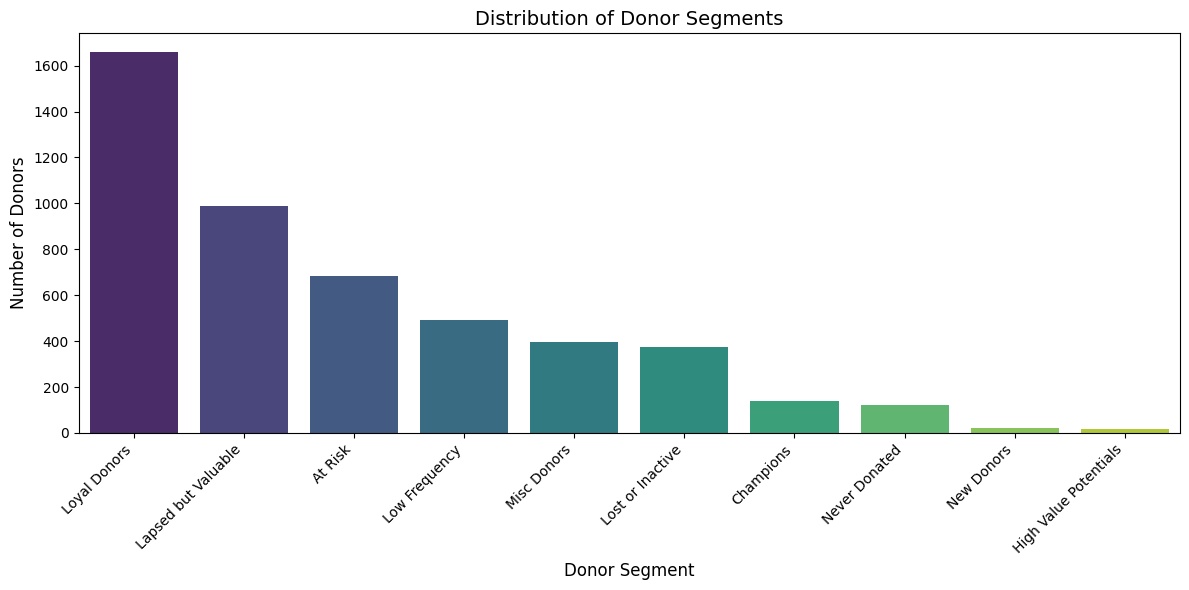

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Count', data=segment_summary, palette='viridis')
plt.title('Distribution of Donor Segments', fontsize=14)
plt.xlabel('Donor Segment', fontsize=12)
plt.ylabel('Number of Donors', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**How are the different categories of donors engaged?**

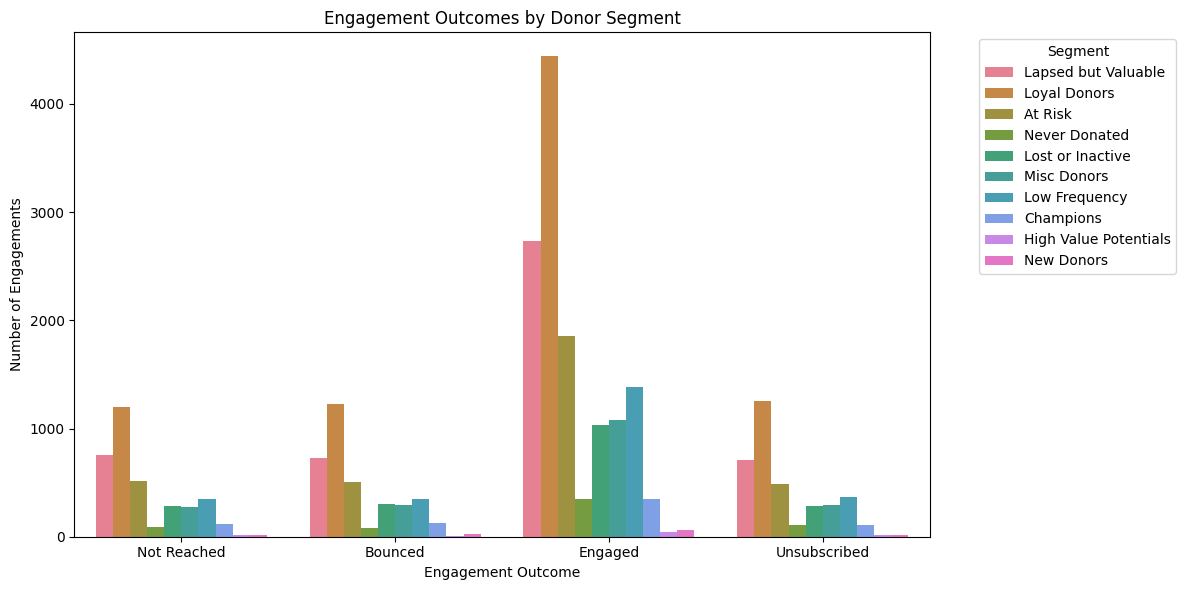

In [56]:
engagements_outcomes = engagement_history.merge(donor_full_summary[['DonorID', 'Segment']], on='DonorID', how='left')

# Create a countplot showing outcomes across segments
plt.figure(figsize=(12, 6))
sns.countplot(data=engagements_outcomes, x='EngagementOutcome', hue='Segment', palette='husl')
plt.title('Engagement Outcomes by Donor Segment')
plt.xlabel('Engagement Outcome')
plt.ylabel('Number of Engagements')
plt.xticks(rotation=0)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Modeling

## Model Evaluation

## Recommendations

## Contact information

Bellow: The Contact Information Of the Two Data scientist in charge of the project.

- First Name: Haender Michael

- Last Name: Jean Louis

- Email: michaelhaenderjeanlouis@gmail.com

- Phone Number: +509 41 75 0264

- LinkedIn: https://www.linkedin.com/in/michael-haender-jean-louis-4b7320316?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app


- First Name:
- Last Name :
- Enail
- Phone Number:
- LinkedIn


For further inquiries, feedback, or collaboration on this analysis, feel free to reach out.